Introduction

This analysis explores data science salaries from 2020 to 2022 using a cleaned and filtered dataset focusing on significant data points. The goal is to find the trends in salaries, demand, and influencing factors in the data science industry. These insights are valuable for job seekers, employers, and industry analysts alike.

In [ ]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


"""
Data Set Source: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data
"""
# Load the dataset
df = pd.read_csv("ds_salaries.csv")

In [97]:
# dataset examination
print(df.info())

print(df.head())

print(df['experience_level'].unique())
print(df['employment_type'].unique())

"""
Experience_Level contain four level: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level
The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           607 non-null    int64  
 2   experience_level    607 non-null    object 
 3   employment_type     607 non-null    object 
 4   job_title           607 non-null    object 
 5   salary              607 non-null    int64  
 6   salary_currency     607 non-null    object 
 7   salary_in_usd       607 non-null    int64  
 8   employee_residence  607 non-null    object 
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    object 
 11  company_size        607 non-null    object 
 12  Unnamed: 12         0 non-null      float64
dtypes: float64(1), int64(5), object(7)
memory usage: 61.8+ KB
None
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020       

'\nExperience_Level contain four level: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level\nThe type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance\n'

In [98]:
# Data cleaning

# Check for missing value
print(df.isnull().sum())

# Check for duplicate
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

# Check for Data type
print(df.dtypes)

# Upper case to ensure consistency
df['experience_level'] = df['experience_level'].str.strip().str.upper()
df['employment_type'] = df['employment_type'].str.strip().str.upper()

# Dataset contain no missing value
# No duplicate row
# Data type seem all correct

Unnamed: 0              0
work_year               0
experience_level        0
employment_type         0
job_title               0
salary                  0
salary_currency         0
salary_in_usd           0
employee_residence      0
remote_ratio            0
company_location        0
company_size            0
Unnamed: 12           607
dtype: int64
Number of duplicate rows: 0
Unnamed: 0              int64
work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                  int64
salary_currency        object
salary_in_usd           int64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
Unnamed: 12           float64
dtype: object


In [99]:
# Remove insignificant data

# Set the threshold for minimum data points
threshold = 25

# Count the number of entries for each country
country_counts = df['company_location'].value_counts()

# Filter the dataset to include only countries meeting the threshold
significant_countries = country_counts[country_counts >= threshold].index
filtered_df = df[df['company_location'].isin(significant_countries)]

# Verify the filtered dataset
print("Original dataset size:", df.shape)
print("Filtered dataset size:", filtered_df.shape)

# Check remaining countries
print(filtered_df['company_location'].value_counts())

Original dataset size: (607, 13)
Filtered dataset size: (460, 13)
company_location
US    355
GB     47
CA     30
DE     28
Name: count, dtype: int64


In [100]:
# Summary of numeric columns
print(filtered_df.describe())

# Count of jobs per country
job_counts = filtered_df['company_location'].value_counts()
print(job_counts)

       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio  \
count  460.000000   460.000000  4.600000e+02     460.000000    460.000000   
mean   326.478261  2021.513043  1.630921e+05  131003.423913     73.586957   
std    172.552722     0.658317  5.422182e+05   68373.409021     41.000067   
min      0.000000  2020.000000  1.200000e+04    5679.000000      0.000000   
25%    180.500000  2021.000000  8.229150e+04   87553.500000     50.000000   
50%    336.500000  2022.000000  1.200800e+05  120000.000000    100.000000   
75%    472.250000  2022.000000  1.642490e+05  161675.000000    100.000000   
max    606.000000  2022.000000  1.100000e+07  600000.000000    100.000000   

       Unnamed: 12  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  
company_location
US    355
GB     47
CA     30
DE     28
Name: count, dtype: int64


In [101]:
# Count of jobs by experience level
exp_counts = filtered_df['experience_level'].value_counts()
print(exp_counts)

# Dataset contain: 280 Senior, 213 Junior, 88 Entry-Level, 26 Executive/Expert

experience_level
SE    252
MI    138
EN     50
EX     20
Name: count, dtype: int64


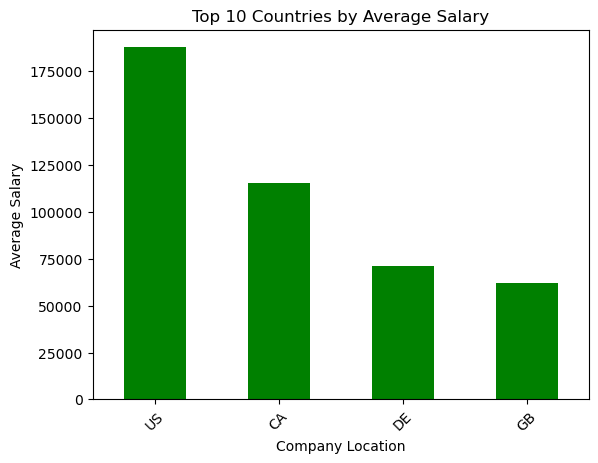

In [102]:
# Average salary by country
avg_salary_country = filtered_df.groupby('company_location')['salary'].mean().sort_values(ascending=False)

# Bar chart
avg_salary_country.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Countries by Average Salary")
plt.xlabel("Company Location")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

job_title
BI Data Analyst                             2.280600e+06
Data Science Manager                        5.599183e+05
Data Analytics Lead                         4.050000e+05
Principal Data Engineer                     3.283333e+05
Financial Data Analyst                      2.750000e+05
NLP Engineer                                2.400000e+05
Head of Data                                2.175000e+05
Director of Data Science                    2.110000e+05
Principal Data Scientist                    2.067143e+05
Machine Learning Infrastructure Engineer    1.950000e+05
Name: salary, dtype: float64


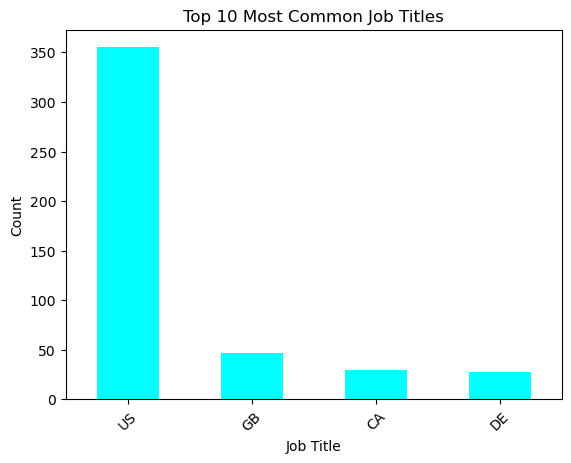

In [105]:
# Top-paying job titles
top_jobs = filtered_df.groupby('job_title')['salary'].mean().sort_values(ascending=False).head(10)
print(top_jobs)

# Bar chart for job title distribution
job_counts.head(10).plot(kind='bar', color='cyan')
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
"""
Frame Questions to Answer

1. What is the average salary for data scientists in US for each Job position?
2. How does the salary vary based on experience level?
3. What are the remote work rate, are remote work options influencing salary distributions?
4. What are the lowest paying industries for data science roles?
5. What is the growth rate for salary between year 2020 to 2022?
6. How has the demand for data science roles evolved over time?
"""
pass

In [109]:
# 1. What is the average salary for data scientists in US for each Job position?
# Since I live in US, so I am curious about the US job market right now.

# Filter dataset for the United States
us_data = filtered_df[filtered_df['company_location'] == 'US']

# Calculate the average salary for each job position
avg_salary_by_job = us_data.groupby('job_title')['salary'].mean().sort_values(ascending=False)

# Set Pandas to display numbers in plain format
pd.options.display.float_format = '{:,.0f}'.format

# Result
print(avg_salary_by_job)

job_title
BI Data Analyst                            2,280,600
Data Science Manager                         559,918
Data Analytics Lead                          405,000
Principal Data Engineer                      328,333
Director of Data Science                     287,500
Financial Data Analyst                       275,000
ML Engineer                                  263,000
Principal Data Scientist                     255,500
NLP Engineer                                 240,000
Applied Data Scientist                       238,000
Head of Data                                 217,500
Director of Data Engineering                 200,000
Machine Learning Infrastructure Engineer     195,000
Research Scientist                           191,000
Lead Data Scientist                          190,000
Data Architect                               185,946
Applied Machine Learning Scientist           178,800
Analytics Engineer                           175,000
Principal Data Analyst              

experience_level
EX   226,494
MI   189,908
SE   160,364
EN    77,470
Name: salary, dtype: float64


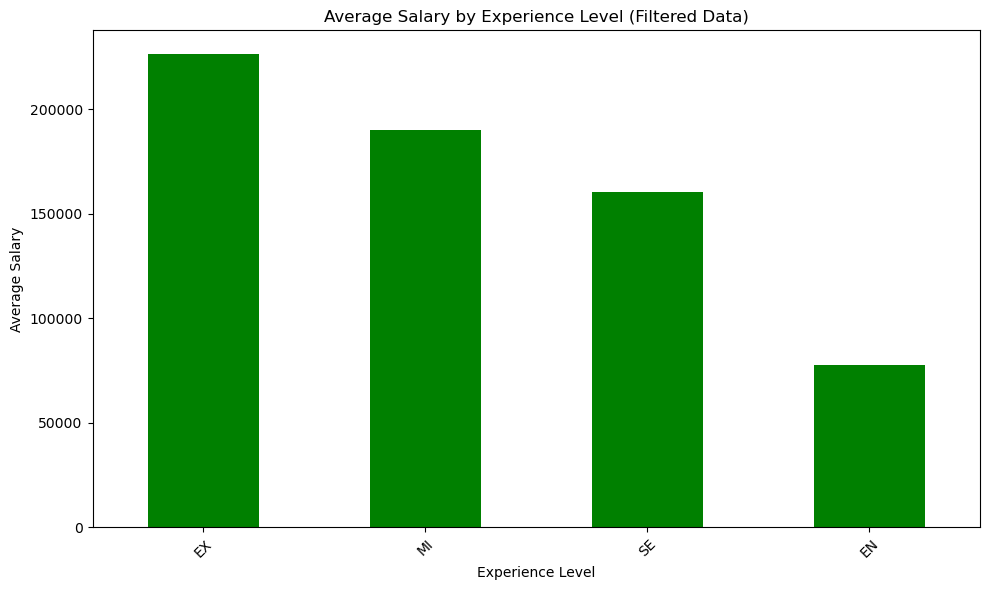

In [111]:
# 2. How does the salary vary based on experience level?

# Calculate the average salary by experience level
avg_salary_experience = filtered_df.groupby('experience_level')['salary'].mean().sort_values(ascending=False)

# Display the result
print(avg_salary_experience)

# Plot the result
avg_salary_experience.plot(kind='bar', figsize=(10, 6), color='green')
plt.title("Average Salary by Experience Level (Filtered Data)")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 3. What are the remote work rate, are remote work options influencing salary distributions?

# Calculate the count and percentage for each remote ratio
remote_distribution = filtered_df['remote_ratio'].value_counts(normalize=True) * 100

# Display remote work distribution
print("Remote Work Distribution (%):")
print(remote_distribution)

# Calculate average salary for each remote ratio
avg_salary_remote = filtered_df.groupby('remote_ratio')['salary'].mean().sort_index()

# Display average salary by remote ratio
print("Average Salary by Remote Ratio:")
print(avg_salary_remote)

# Result shows about 70% of people are working in remote.
# The people who working in hybrid are earning the most salary.

Remote Work Distribution (%):
remote_ratio
100   68
0     21
50    11
Name: proportion, dtype: float64
Average Salary by Remote Ratio:
remote_ratio
0     117,765
50    410,089
100   138,550
Name: salary, dtype: float64


In [115]:
# 4. What are the lowest paying industries for data science roles?

# Calculate average salary by industry
avg_salary_industry = filtered_df.groupby('job_title')['salary'].mean().sort_values(ascending=True)

# Display the lowest-paying industries
print("Lowest-Paying Industries for Data Science Roles:")
print(avg_salary_industry.head(10))

Lowest-Paying Industries for Data Science Roles:
job_title
Finance Data Analyst                 45,000
Data Science Consultant              75,400
Computer Vision Software Engineer    75,500
Data Analytics Engineer              75,667
Lead Machine Learning Engineer       80,000
Big Data Engineer                    85,000
AI Scientist                         86,000
Computer Vision Engineer             92,500
Machine Learning Developer          100,000
Data Analyst                        100,499
Name: salary, dtype: float64


Average Salary by Experience Level (2020 to 2022):
work_year           2020    2021    2022
experience_level                        
EN                89,655  74,648  72,650
EX               325,000 268,714 193,656
MI               113,217 328,411 100,949
SE               153,517 217,406 144,636


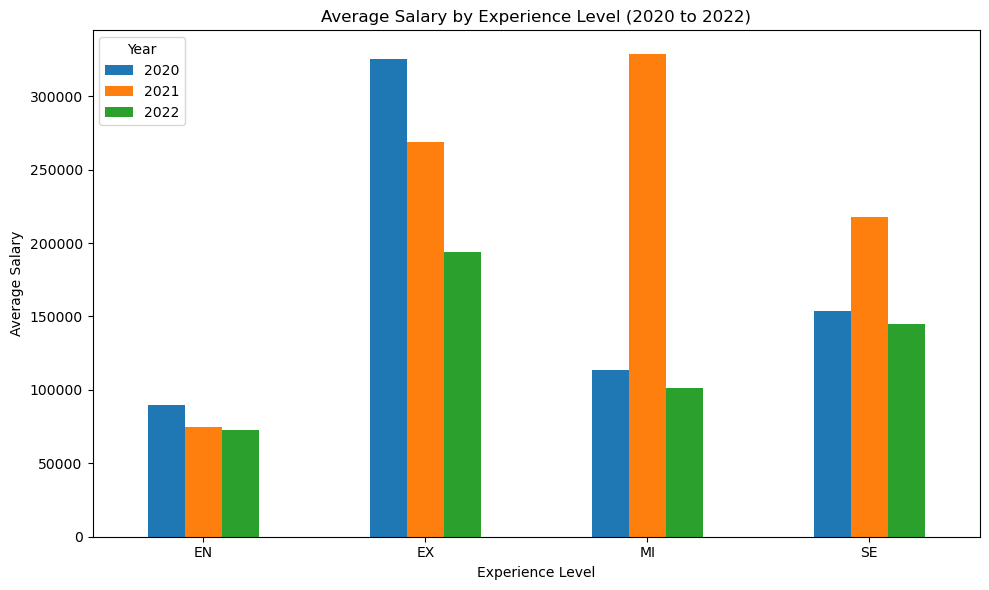

In [ ]:
# What is the average salary between year 2020 to 2022 for each level?

# Filter data for years 2020, 2021, and 2022
filtered_years = filtered_df[filtered_df['work_year'].isin([2020, 2021, 2022])]

# Group by experience level and year, then calculate the average salary
avg_salary_by_year_level = filtered_years.groupby(['experience_level', 'work_year'])['salary'].mean().unstack()

# Display the result
print("Average Salary by Experience Level (2020 to 2022):")
print(avg_salary_by_year_level)

# Plot the result
avg_salary_by_year_level.plot(kind='bar', figsize=(10, 6))
plt.title("Average Salary by Experience Level (2020 to 2022)")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.legend(title="Year", loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Result shows the average salary is dropping between 2020 to 2022.

In [123]:
# 6. How has the demand for data science roles evolved over time?

# Count the number of job postings for each year
demand_by_year = filtered_df['work_year'].value_counts().sort_index()

# Display the result
print("Demand for Data Science Roles Over Time:")
print(demand_by_year)

Demand for Data Science Roles Over Time:
work_year
2020     42
2021    140
2022    278
Name: count, dtype: int64


In [ ]:
# Count job postings by experience level and year
job_counts_by_level_year = filtered_df.groupby(['work_year', 'experience_level'])['salary'].count().unstack()
print(job_counts_by_level_year)

# Combine demand and average salary data
avg_salary_by_year = filtered_df.groupby('work_year')['salary'].mean()
correlation = demand_by_year.corr(avg_salary_by_year)
print(f"Correlation between demand and average salary: {correlation}")

# Since correlation is negative, it would suggest that the increasing demand is indeed a factor contributing to salary drops.

experience_level  EN  EX  MI   SE
work_year                        
2020              11   1  18   12
2021              27   7  53   53
2022              12  12  67  187
Correlation between demand and average salary: -0.02005079439590191


Insights from Data Science Salary Analysis (2020–2022)

Key Findings
1. Average Salary by Job Position
Senior and specialized roles, such as BI Data Analyst and Principal Data Engineer, have the highest average salaries, with some exceeding $2 million annually. Entry-level positions, like Data Specialist, have significantly lower salaries.

2. Salary Trends by Experience Level (2020–2022)
The average salary has declined across all experience levels between 2020 and 2022:
Entry-Level (EN): Dropped from $89,655 in 2020 to $72,650 in 2022.
Junior (MI): Dropped from $113,217 in 2020 to $100,949 in 2022.
Senior-Level (SE): Dropped from $153,517 in 2020 to $144,636 in 2022. This trend suggests increased competition in the job market, potentially due to a growing number of professionals entering the field.

3. Remote Work Trends
Hybrid remote roles offer higher salaries on average compared to onsite or fully remote roles. This trend reflects the growing demand for remote work and the premium companies are willing to pay to attract talent globally.

4. Demand for Data Science Roles
The demand for data science roles has steadily increased.

Actionable Insights

Focus on acquiring specialized skills for high-paying roles like data engineering or business intelligence.
Consider opportunities in hybrid roles, which often offer higher salaries and flexibility.

Offering hybrid or remote work options could help attract top-tier talent.
Competitive salary packages, especially for senior roles, are essential to retain skilled professionals.

Conclusion
The data science field is one of the fastest-growing industries. While demand for data scientists has increased, the declining average salaries highlight the importance for employee to staying competitive through skill enhancement, role specialization, and industry alignment. Employers must adapt to changing trends in remote work and role expectations to attract and retain top talent.